# Artificial Neural Network

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from numpy import loadtxt
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
tf.__version__

'2.9.1'

## Part 1 - Data Preprocessing

### Importing the dataset

In [2]:
%cd Z:\PPMI_Data\Excels\CollaborativeFiltering\Methylation_Model
df = pd.read_csv('NMI_Methylome_Male06_Age.csv')
# Removing a column
dataset = df.drop(['PATNO', 'Patient_ID','Age'], axis = 1)
#dataset.insert (1, 'Age', df ['Age'])
# Making APPRDX values from 1 & 2 to 0 & 1
dataset['APPRDX'] = dataset['APPRDX'] - 1
print(dataset.shape)
dataset.head(2)

Z:\PPMI_Data\Excels\CollaborativeFiltering\Methylation_Model
(308, 328)


,APPRDX,cg00017221,cg00030584,cg00113363,cg00128386,cg00156743,cg00295303,cg00418511,cg00558297,cg00597128,...,cg26879084,cg26926318,cg26941073,cg27079446,cg27175112,cg27281389,cg27339255,cg27366263,cg27603338,cg27648238
0,0,0.023520,0.344298,0.021304,0.960123,0.821042,0.824603,0.038859,0.776180,0.653704,...,0.835011,0.916727,0.925943,0.017127,0.895680,0.026921,0.873614,0.873463,0.458258,0.845385
1,0,0.033311,0.306851,0.012358,0.934346,0.823265,0.875819,0.019836,0.366488,0.732829,...,0.811623,0.912079,0.915694,0.018519,0.928806,0.033420,0.832723,0.863693,0.445499,0.834479


In [3]:
dataset.tail(2)

,APPRDX,cg00017221,cg00030584,cg00113363,cg00128386,cg00156743,cg00295303,cg00418511,cg00558297,cg00597128,...,cg26879084,cg26926318,cg26941073,cg27079446,cg27175112,cg27281389,cg27339255,cg27366263,cg27603338,cg27648238
306,1,0.015719,0.380722,0.010514,0.963340,0.899114,0.890893,0.038055,0.772920,0.348175,...,0.852996,0.908892,0.933013,0.018602,0.903400,0.011374,0.862685,0.764067,0.440161,0.906936
307,1,0.026659,0.195581,0.014547,0.958277,0.865897,0.844592,0.022062,0.604574,0.781507,...,0.838157,0.929789,0.931938,0.017685,0.886063,0.019583,0.856798,0.897929,0.435785,0.863049


In [4]:
X = dataset.iloc[:, 1:].values
y = dataset.iloc[:, 0].values
print(X)

[[0.02351958 0.34429838 0.02130382 ... 0.87346307 0.45825781 0.84538476]
 [0.03331114 0.3068507  0.0123584  ... 0.86369311 0.44549871 0.83447915]
 [0.02915928 0.49401904 0.01306744 ... 0.85038726 0.47158239 0.79721014]
 ...
 [0.03169496 0.45841932 0.01553139 ... 0.85365979 0.54731595 0.87283149]
 [0.01571926 0.38072169 0.01051411 ... 0.76406653 0.44016127 0.90693643]
 [0.02665907 0.19558137 0.01454701 ... 0.89792933 0.43578519 0.86304876]]


In [5]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1]


### Splitting the dataset into the Training set and Test set

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(y_test)

[0 1 1 1 1 0 0 1 1 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0]


from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Compiling the Network

In [9]:

# define the keras model
model = Sequential()
model.add(Dense(300, input_shape=(327,), activation='relu'))
#model.add(tf.keras.layers.Dropout(0.1))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
opt=tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 300)               98400     
                                                                 
 dense_5 (Dense)             (None, 100)               30100     
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                 11        
                                                                 
Total params: 129,521
Trainable params: 129,521
Non-trainable params: 0
_________________________________________________________________


ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=10, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.01)))
#ann.add(tf.keras.layers.Dropout(0.1))
ann.add(tf.keras.layers.Dense(units=5, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.01)))
#ann.add(tf.keras.layers.Dropout(0.1))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [10]:
history = model.fit(X_train, y_train, epochs = 50, validation_split = 0.2)

Epoch 1/50
7/7 [==============================] - 1s 31ms/step - loss: 1.2075 - accuracy: 0.6224 - val_loss: 0.6381 - val_accuracy: 0.7000
Epoch 2/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6393 - accuracy: 0.6939 - val_loss: 0.6196 - val_accuracy: 0.7000
Epoch 3/50
7/7 [==============================] - 0s 6ms/step - loss: 0.6293 - accuracy: 0.6939 - val_loss: 0.6525 - val_accuracy: 0.7000
Epoch 4/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6652 - accuracy: 0.6939 - val_loss: 0.6414 - val_accuracy: 0.7000
Epoch 5/50
7/7 [==============================] - 0s 5ms/step - loss: 0.6428 - accuracy: 0.6939 - val_loss: 0.6262 - val_accuracy: 0.7000
Epoch 6/50
7/7 [==============================] - 0s 6ms/step - loss: 0.6789 - accuracy: 0.6939 - val_loss: 0.6698 - val_accuracy: 0.7000
Epoch 7/50
7/7 [==============================] - 0s 10ms/step - loss: 0.6692 - accuracy: 0.6939 - val_loss: 0.6648 - val_accuracy: 0.7000
Epoch 8/50
7/7 [================

## Part 4 - Making the predictions and evaluating the model

### Predicting the Test set results

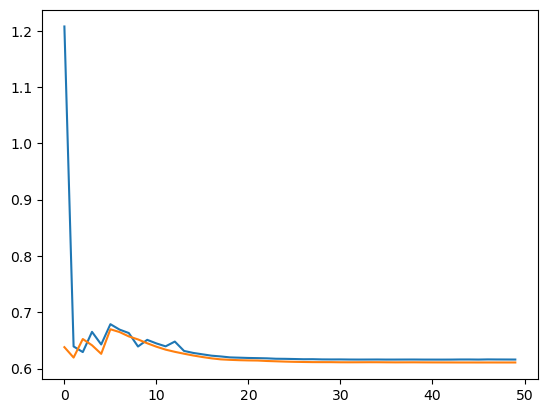

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [14]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

2/2 [==============================] - 0s 16ms/step
[[0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

In [15]:
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[43  0]
 [19  0]]


0.6935483870967742

In [ ]:
has_dropout = False
for layer in model.layers:
    if isinstance(layer, tf.keras.layers.Dropout):
        has_dropout = True
        break
if has_dropout:
    print("Model has dropout layers.")
else:
    print("Model does not have dropout layers.")


In [ ]:
has_regularization = False
for layer in model.layers:
    if isinstance(layer, tf.keras.layers.Dense):
        if layer.kernel_regularizer is not None or layer.bias_regularizer is not None:
            has_regularization = True
            break
if has_regularization:
    print("Model has regularization.")
else:
    print("Model does not have regularization.")


## Save model

In [ ]:
# Save model
#model.save("model_ann.h5")

In [ ]:
model.summary()